## CNN卷積神經網路 ##
* 以貓狗照片資料集進行模型建立, 辦認是貓(0)還是狗(1)
* 以家中愛犬及愛喵共10張照片進行模型泛化測試
****
* 模型1－泛化結果：準確率:0.500
* 模型2－泛化結果：準確率:0.700
* 模型3－泛化結果：準確率:0.600

In [84]:
import numpy as np
import os
import glob,cv2
from keras.utils import np_utils
np.random.seed(10)
from sklearn.preprocessing import MinMaxScaler #feature正規化
import matplotlib.pyplot as plt
from keras.models import load_model
#from keras.models import Sequential
#from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [85]:
# 自定呈現方式
import matplotlib.pyplot as plt
def show_image_labels_predictions(images, lables, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[start_id])

        if len(predictions)>0:
            title = 'pred = '+ str(predictions[start_id])
            title += ('(O)' if predictions[start_id]==lables[start_id] else '(X)')
            title += '\nlabel = '+ str(lables[start_id])
        else:
            title = 'label = '+ str(lables[start_id])

        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

In [97]:
#將指定資料夾(同一層)中照片，取得feature_array 及 label_array
def get_file_array(folder,label_code):
    feature = []
    label = []
    for file in os.listdir(r'./' + folder):
        img = cv2.imread(folder + '/' + file)
        new_img = cv2.resize(img, (128, 128))
        
        #轉成array
        feature.append(new_img)
        feature_array = np.array(feature)
        label.append(label_code)
        label_array = np.array(label)
        
    return feature_array,label_array

In [98]:
#取讀資料夾照片成為array
feature_array_cat,label_array_cat = get_file_array('test/cat',0)
feature_array_dog,label_array_dog = get_file_array('test/dog',1)

In [99]:
print(feature_array_cat.shape)
print(label_array_cat)
print(feature_array_dog.shape)
print(label_array_dog)

(5, 128, 128, 3)
[0 0 0 0 0]
(5, 128, 128, 3)
[1 1 1 1 1]


In [100]:
#array合併
feature_concat = np.concatenate([feature_array_cat,feature_array_dog])
label_concat = np.concatenate([label_array_cat,label_array_dog])
print(feature_concat.shape)
print(label_concat)

(10, 128, 128, 3)
[0 0 0 0 0 1 1 1 1 1]


In [101]:
#轉浮點數
feature = np.concatenate([feature_array_cat,feature_array_dog]).astype('float32')
label = np.concatenate([label_array_cat,label_array_dog]).astype('float32')

In [102]:
#feature處理_正規化
feature_normalize = feature/255

In [103]:
#Label處理_one-hot-encoding
label_onehot = np_utils.to_categorical(label)

In [112]:
print('載入模型 DogCat_CNNmodle_2.h5')
model = load_model('DogCat_CNNmodle_2.h5')

載入模型 DogCat_CNNmodle_2.h5


In [113]:
#預測
prediction=model.predict_classes(feature_normalize)

In [114]:
#評估準確率 evaluate()
scores = model.evaluate(feature_normalize, label_onehot)
print('準確率:{:.3f}'.format( scores[1]))

10/10 [==============================] - 0s 4ms/step
準確率:0.700


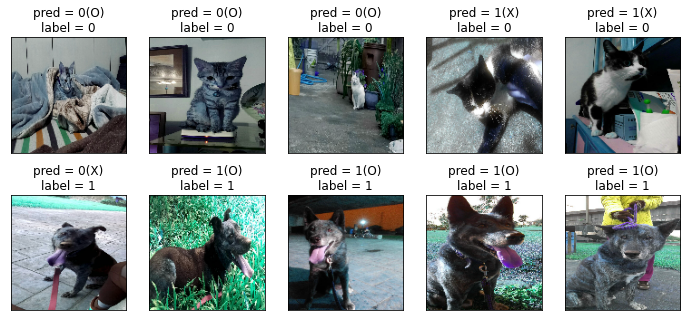

In [115]:
#顯示圖像、預測值、真實值
#feature不能用浮點數型態的，圖片顯示會空白色一片...
show_image_labels_predictions(feature_concat,label_concat,prediction,0,len(feature))